## **CSCN8010** - Foundation of Machine Learning

### **Practical Lab 1**: Linear Regression

#### **Name**: Paljeet Singh Sambhi - Section 1
#### **Student ID**: 8918495


##### Importing packages



In [442]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Framing the problem
The task is to create a model that predicts the house prices with the helpm of this dataset(California Housing Prices). We are trying to pridict the values of dependent variable(House Value) using the independent variables(Income, Population, Households) and we are going to use linear regression for it. As linear regression is used for Quantify the functional relationship between a dependent variable and one or more independent variables. 

#### Obtaining the Data

##### Source: Downloaded from [Kaggle California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data)

In [443]:
housing = pd.read_csv('../data/housing.csv')

#### Exploratory Data Analysis (EDA)

 An approach to analyzing data sets to summarize their main characteristics, often with visual methods.

In [444]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


1. Median Income (median_income): Reflects household income; strong predictor of housing prices with a wide range across socio-economic levels.

2. Population(population): Total number of people in an area; weak correlation with housing prices despite large variation.

3. Households(households): Number of households in a block group; moderately impacts housing prices, with a positive but smaller effect than income.

4. Median House Value (median_house_value): Target variable representing home prices; dependent on socio-economic factors like income and households.

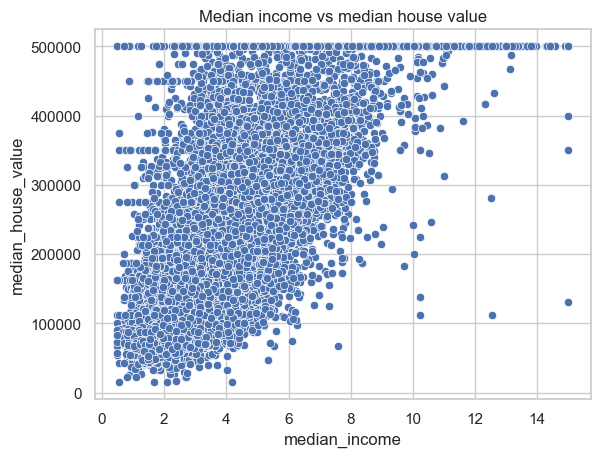

In [445]:
sns.scatterplot(x="median_income", y="median_house_value", data=housing)
plt.title("Median income vs median house value")
plt.show()


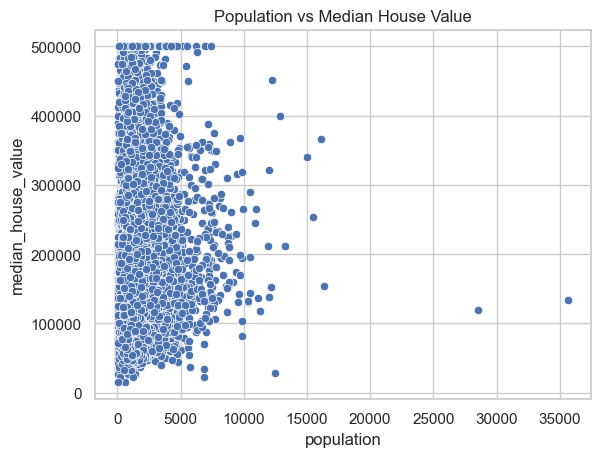

In [446]:
sns.scatterplot(x="population", y="median_house_value", data=housing)
plt.title("Population vs Median House Value")
plt.show()

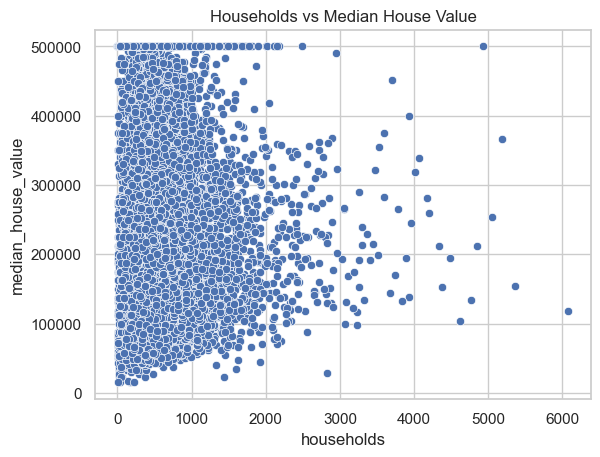

In [447]:
sns.scatterplot(x="households", y="median_house_value", data=housing)
plt.title("Households vs Median House Value")
plt.show()

### Data Preprocessing

Filter out records with median_house_value = 500001 since it seems to be a cap for the median_house_value.

In [448]:
housing_preprocessed = housing[housing.median_house_value != 500001]

In [449]:
print(f"After filtering, there are {len(housing_preprocessed)} records, versus {len(housing)} before filtering")

After filtering, there are 19675 records, versus 20640 before filtering


# Train and Test Split

Split the data into training/testing sets. 
Use the first 80% of the data for training.

In [450]:
train_size = int(len(housing_preprocessed) * 0.8)
train = housing_preprocessed[:train_size]
test = housing_preprocessed[train_size:]

Scatter plot, train in blue and test in red in the same plot for each case


<Axes: xlabel='median_income', ylabel='median_house_value'>

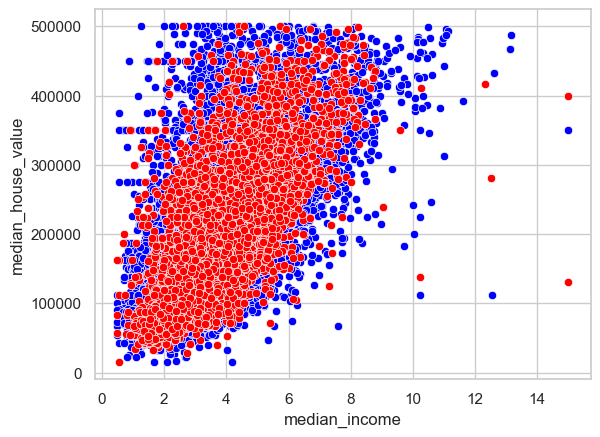

In [451]:
sns.scatterplot(x="median_income", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="median_income", y="median_house_value", data=test, color="red")

<Axes: xlabel='population', ylabel='median_house_value'>

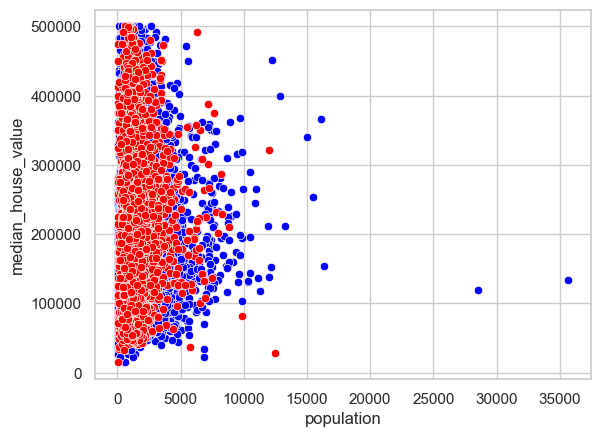

In [452]:
sns.scatterplot(x="population", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="population", y="median_house_value", data=test, color="red")

<Axes: xlabel='households', ylabel='median_house_value'>

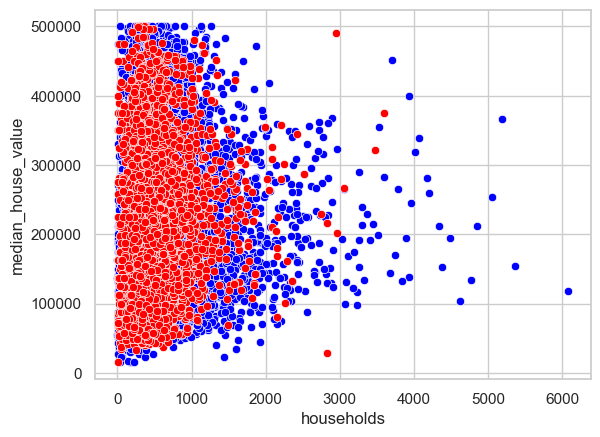

In [453]:
sns.scatterplot(x="households", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="households", y="median_house_value", data=test, color="red")

# Define a Model

Create 3 linear regression object for each case

In [454]:
model_income = linear_model.LinearRegression()
model_population = linear_model.LinearRegression()
model_households = linear_model.LinearRegression()

# Train the Model

In [455]:
# Fit for median_income
model_income.fit(X=train[["median_income"]], y=train[["median_house_value"]])

LinearRegression()

In [456]:
# Fit for population
model_population.fit(X=train[["population"]], y=train[["median_house_value"]])

LinearRegression()

In [457]:
# Fit for households
model_households.fit(X=train[["households"]], y=train[["median_house_value"]])

LinearRegression()

# Evaluate the Model

In a single table for all three linear regressions, provide per regression model :
- Intercept and slope 
- Mean Squared Error 
- Mean Absolute Error

In [458]:
income_mse_train = mean_squared_error(train[["median_house_value"]], model_income.predict(train[["median_income"]]))
pop_mse_train = mean_squared_error(train[["median_house_value"]], model_population.predict(train[["population"]]))
households_mse_train = mean_squared_error(train[["median_house_value"]], model_households.predict(train[["households"]]))

income_mae_train = mean_absolute_error(train[["median_house_value"]], model_income.predict(train[["median_income"]]))
pop_mae_train = mean_absolute_error(train[["median_house_value"]], model_population.predict(train[["population"]]))
households_mae_train = mean_absolute_error(train[["median_house_value"]], model_households.predict(train[["households"]]))

income_mse_test = mean_squared_error(test[["median_house_value"]], model_income.predict(test[["median_income"]]))
pop_mse_test = mean_squared_error(test[["median_house_value"]], model_population.predict(test[["population"]]))
households_mse_test = mean_squared_error(test[["median_house_value"]], model_households.predict(test[["households"]]))

income_mae_test = mean_absolute_error(test[["median_house_value"]], model_income.predict(test[["median_income"]]))
pop_mae_test = mean_absolute_error(test[["median_house_value"]], model_population.predict(test[["population"]]))
households_mae_test = mean_absolute_error(test[["median_house_value"]], model_households.predict(test[["households"]]))



results = pd.DataFrame({
    'Model': ['Median Income', 'Population', 'Households'],
    'Intercept': [model_income.intercept_[0], model_population.intercept_[0], model_households.intercept_[0]],
    'Slope': [model_income.coef_[0][0], model_population.coef_[0][0], model_households.coef_[0][0]],
    'MSE TRAIN': [income_mse_train , pop_mse_train, households_mse_train],
    'MAE TRAIN': [income_mae_train, pop_mae_train, households_mae_train],
})

results['Intercept'] = results['Intercept'].map('{:.4f}'.format)
results['Slope'] = results['Slope'].map('{:.4f}'.format)
results['MSE TRAIN'] = results['MSE TRAIN'].map('{:.4f}'.format)
results['MAE TRAIN'] = results['MAE TRAIN'].map('{:.4f}'.format)



display(results)

,Model,Intercept,Slope,MSE TRAIN,MAE TRAIN
0,Median Income,48204.5344,38702.9723,5557954319.2592,55839.9986
1,Population,188081.5886,0.3286,9236185598.9690,75879.5266
2,Households,177147.2885,22.6257,9156895298.2877,75463.1065


In [459]:
model_income.predict(X=[[12],[1],[100]])

d:\Applied AI & ML\Foundation of Machine Learning\CSCCN8010-labs\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 512640.20242926],
       [  86907.50670659],
       [3918501.76821055]])

In [460]:
model_population.predict(X=[[12],[1],[100]])

d:\Applied AI & ML\Foundation of Machine Learning\CSCCN8010-labs\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[188085.53218256],
       [188081.91725556],
       [188114.45159855]])

In [461]:
model_households.predict(X=[[12],[1],[100]])

d:\Applied AI & ML\Foundation of Machine Learning\CSCCN8010-labs\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[177418.79724925],
       [177169.91426426],
       [179409.86112921]])

Scatter Plot with MSE, MAE, intercept and slope for Median Income model 

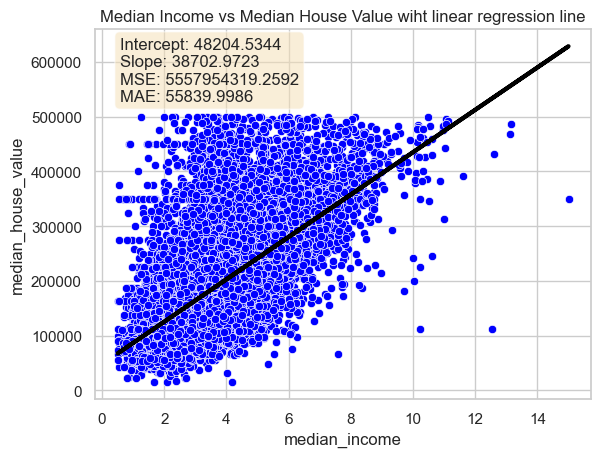

In [462]:
# plot the regression line against the training data for median_income model
sns.scatterplot(x="median_income", y="median_house_value", data=train, color="blue")
plt.title("Median Income vs Median House Value wiht linear regression line")
plt.plot(train[["median_income"]], model_income.predict(train[["median_income"]]), color="black", linewidth=3)
textstr = (f'Intercept: {results.loc[0, "Intercept"]}\n'
           f'Slope: {results.loc[0, "Slope"]}\n'
           f'MSE: {results.loc[0, "MSE TRAIN"]}\n'
           f'MAE: {results.loc[0, "MAE TRAIN"]}')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.98, textstr, transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', bbox=props)
plt.show()


Scatter Plot with MSE, MAE, intercept and slope for Polution model 

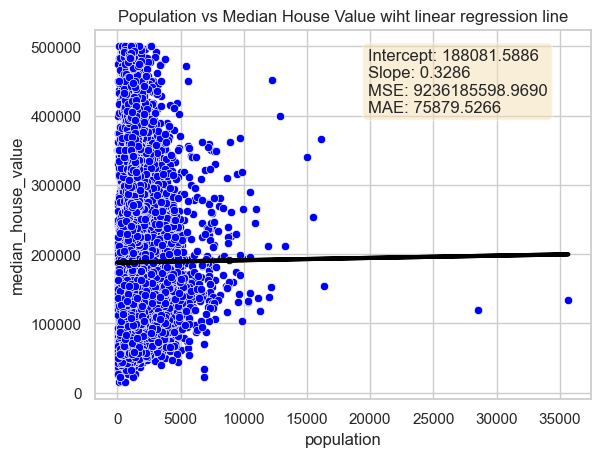

In [463]:
# plot the regression line against the training data for population model
sns.scatterplot(x="population", y="median_house_value", data=train, color="blue")
plt.plot(train[["population"]], model_population.predict(train[["population"]]), color="black", linewidth=3)
plt.title("Population vs Median House Value wiht linear regression line")
textstr = (f'Intercept: {results.loc[1, "Intercept"]}\n'
           f'Slope: {results.loc[1, "Slope"]}\n'
           f'MSE: {results.loc[1, "MSE TRAIN"]}\n'
           f'MAE: {results.loc[1, "MAE TRAIN"]}')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.55, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', bbox=props)
plt.show()


Scatter Plot with MSE, MAE, intercept and slope for households model 

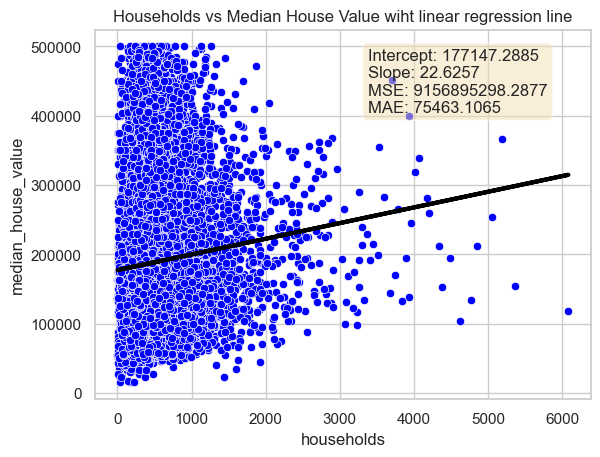

In [464]:
# plot the regression line against the training data for households model
sns.scatterplot(x="households", y="median_house_value", data=train, color="blue")
plt.plot(train[["households"]], model_households.predict(train[["households"]]), color="black", linewidth=3)
plt.title("Households vs Median House Value wiht linear regression line")
textstr = (f'Intercept: {results.loc[2 , "Intercept"]}\n'
           f'Slope: {results.loc[2, "Slope"]}\n'
           f'MSE: {results.loc[2, "MSE TRAIN"]}\n'
           f'MAE: {results.loc[2, "MAE TRAIN"]}')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.55, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', bbox=props)
plt.show()


In the above 

#### SUMMARY

After reviewing the performances of each model the insights are as follows:
1. The median_income model outperforms the other two model as we can see it has the lowest MSE and MAE which suggests that the model is more accurate for the given dataset
2. The Households model sits between the other two models in terms of accuracy.
3. The population model has the highest MSE and MAE which suggest that the model has lower accuracy.
4. The linear function that is plotted on the median_income intercepts more instances than the other two model.